In [1]:
!pip install networkx matplotlib


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
def generate_graph(n, weight_range=(1, 100)):
    G = nx.complete_graph(n)
    for (u, v) in G.edges():
        G[u][v]['weight'] = random.randint(*weight_range)
    return G

In [4]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

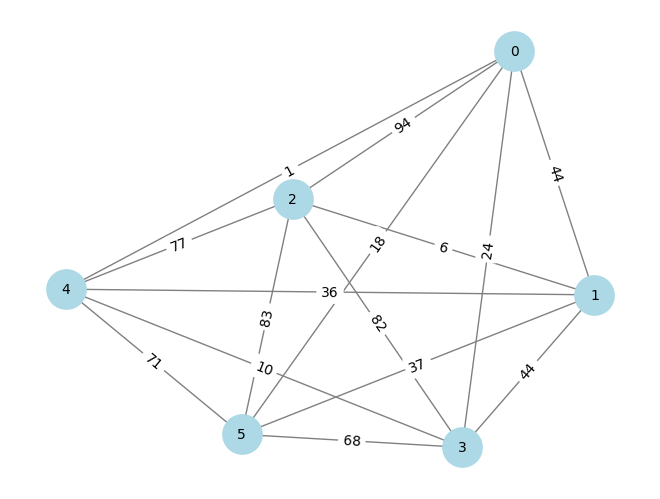

In [5]:
n_nodes = 6
G = generate_graph(n_nodes)
draw_graph(G)

In [6]:
from networkx.algorithms.tree.mst import minimum_spanning_tree

In [7]:
def compute_mst(G):
    mst = minimum_spanning_tree(G, algorithm='kruskal')
    return mst

In [8]:
def draw_mst(G, mst):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    # Draw graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight edges
    nx.draw_networkx_edges(G, pos, edgelist=mst.edges(), edge_color='red', width=2)

    plt.show()

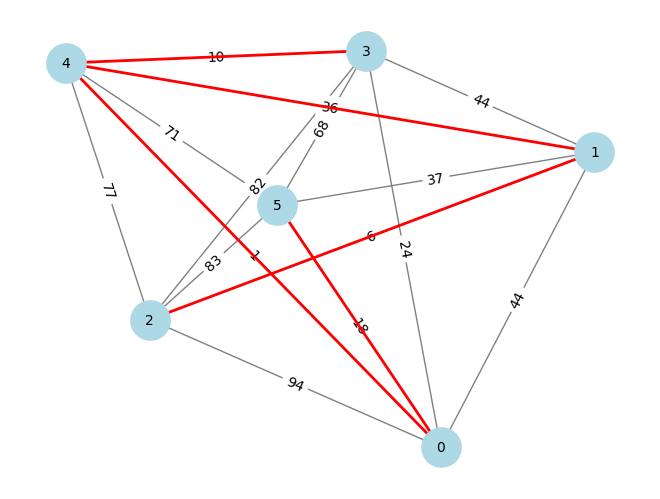

In [9]:
mst = compute_mst(G)
draw_mst(G, mst)

In [10]:
def tsp_approximation(mst, start_node=0):
    #  Preorder DFS traversal on MST to get an approximate TSP tour.
    visited = []

    def dfs(node):
        if node not in visited:
            visited.append(node)
            for neighbor in mst.neighbors(node):
                dfs(neighbor)

    dfs(start_node)

    # returning to the start
    visited.append(visited[0])
    return visited

In [11]:
tsp_tour = tsp_approximation(mst)

In [12]:
def draw_tsp_tour(G, tour):
    pos = nx.spring_layout(G)

    # graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10)

    # path
    tour_edges = list(zip(tour, tour[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=tour_edges, edge_color='green', width=2)

    plt.title("Approximate TSP Tour using MST + DFS")
    plt.show()

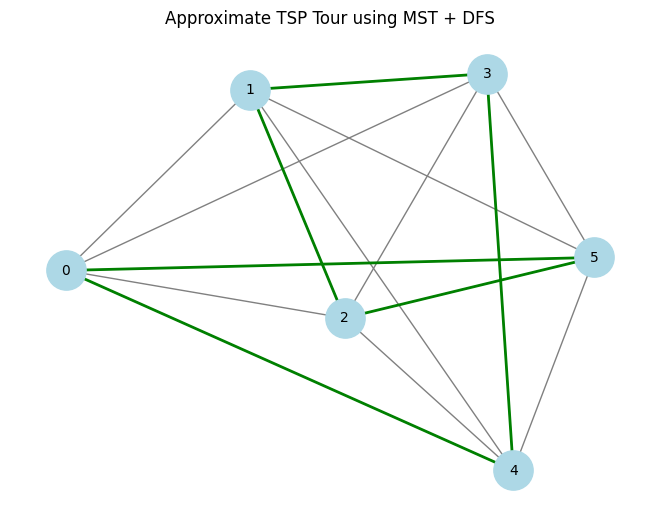

TSP Tour: [0, 4, 3, 1, 2, 5, 0]


In [13]:
draw_tsp_tour(G, tsp_tour)
print("TSP Tour:", tsp_tour)